# Project notebook

- Easy access to all the experimental data generated in the lab
- All the results from statistical analysis
- Visualization of reports
- All the the python functionality at hand

## Library import

In [1]:
from report_manager import project, analysisResult
from plotly.offline import init_notebook_mode, iplot
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
%matplotlib inline

/Users/plh450/CKG_env_updated/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:197: UserWarning:

R object inheriting from "POSIXct" but without attribute "tzone".

Using TensorFlow backend.
/Users/plh450/CKG_env_updated/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:197: UserWarning:

R object inheriting from "POSIXct" but without attribute "tzone".



## Creating a Project object

- Connects to the database
- Extracts all the project information depending on the data types: Cinical, Proteomics, Whole-exome sequencing, etc.
- Runs all the default analyses
- Returns all datasets and analyses results, and plots

In [2]:
p = project.Project('P0000001', datasets={}, report={})

In [3]:
p.build_project()

In [4]:
p.generate_report()

In [5]:
p.datasets['multiomics'].data['wgcna_wgcna']['wgcna-proteomics']['module_trait_cor'].set_index('index').stack().reset_index()

index                                          level_1         0
0        MEblue                                              Age  0.178770
1        MEblue             Alanine aminotransferase measurement -0.003609
2        MEblue                 Alkaline phosphatase measurement  0.337460
3        MEblue           Aspartate aminotransferase measurement  0.229341
4        MEblue                                  Bilirubin level  0.190024
5        MEblue                                      Body height -0.185584
6        MEblue                                  Body mass index  0.081538
7        MEblue                                         Diastole -0.363305
8        MEblue                      Fasting blood glucose level  0.136142
9        MEblue           Gamma glutamyl transferase measurement  0.047883
10       MEblue                       Hemoglobin A1c measurement -0.176518
11       MEblue             High density lipoprotein measurement  0.061538
12       MEblue  Low density lipoprotein cholesterol measurement -0.179789
13       MEblue                                          Systole -0.231156
14       MEblue                        Triglycerides measurement -0.233457
15       MEblue                     VLDL cholesterol measurement -0.111514
16       MEblue              Weight (property) (qualifier value) -0.261538
17       MEblue                                  platelets/liter -0.331152
18  MEturquoise                                              Age -0.001587
19  MEturquoise             Alanine aminotransferase measurement  0.002915
20  MEturquoise                 Alkaline phosphatase measurement  0.001145
21  MEturquoise           Aspartate aminotransferase measurement  0.027711
22  MEturquoise                                  Bilirubin level  0.337508
23  MEturquoise                                      Body height -0.084574
24  MEturquoise                                  Body mass index  0.216585
25  MEturquoise                                         Diastole -0.305290
26  MEturquoise                      Fasting blood glucose level  0.247054
27  MEturquoise           Gamma glutamyl transferase measurement -0.118604
28  MEturquoise                       Hemoglobin A1c measurement -0.214547
29  MEturquoise             High density lipoprotein measurement  0.017588
30  MEturquoise  Low density lipoprotein cholesterol measurement -0.162968
31  MEturquoise                                          Systole -0.293806
32  MEturquoise                        Triglycerides measurement -0.136386
33  MEturquoise                     VLDL cholesterol measurement -0.008920
34  MEturquoise              Weight (property) (qualifier value) -0.074043
35  MEturquoise                                  platelets/liter -0.185432
36       MEgrey                                              Age -0.065187
37       MEgrey             Alanine aminotransferase measurement  0.113229
38       MEgrey                 Alkaline phosphatase measurement  0.054767
39       MEgrey           Aspartate aminotransferase measurement  0.160424
40       MEgrey                                  Bilirubin level  0.273056
41       MEgrey                                      Body height -0.086310
42       MEgrey                                  Body mass index  0.063395
43       MEgrey                                         Diastole -0.111558
44       MEgrey                      Fasting blood glucose level  0.089370
45       MEgrey           Gamma glutamyl transferase measurement -0.214089
46       MEgrey                       Hemoglobin A1c measurement  0.014028
47       MEgrey             High density lipoprotein measurement -0.059221
48       MEgrey  Low density lipoprotein cholesterol measurement  0.008052
49       MEgrey                                          Systole -0.212412
50       MEgrey                        Triglycerides measurement  0.071747
51       MEgrey                     VLDL cholesterol measurement  0.208672
52       MEgrey              Weight

In [6]:
import pandas as pd
import networkx as nx
pkn = p.datasets['proteomics'].generate_knowledge()
ckn = p.datasets['clinical'].generate_knowledge()
mkn = p.datasets['multiomics'].generate_knowledge()
pkn.generate_knowledge_graph()
ckn.generate_knowledge_graph()
mkn.generate_knowledge_graph()

Disease MATCH (protein:Protein)-[r]-(disease:Disease) WHERE ((protein.name+"~"+protein.id) IN ["A2M~P01023","A30~A2MYE2","AFM~P43652","ALDOB~P05062","APCS~P02743","APOC4-APOC2~K7ER74","APOM~O95445","C1QB~P02746","C1QTNF3~Q9BXJ4","C3~P01024","C6~P13671","C7~P10643","CD5L~O43866","CD99~P14209","CFD~P00746","CFH~P08603","CLU~P10909","COLEC11~Q9BWP8","CPB2~Q96IY4","CPN2~P22792","CRP~P02741","F11~P03951","FCGBP~Q9Y6R7","FCGR3B~O75015","FGA~P02671","GANAB~Q14697","GP1BA~P07359","IGFALS~P35858","IGFBP3~P17936","IGH@~Q6GMX6","IGHM~P01871","IGHV5-51~A0A0C4DH38","ITIH1~P19827","ITIH4~B7ZKJ8","JCHAIN~P01591","KLKB1~P03952","LGALS3BP~Q08380","LYVE1~Q9Y5Y7","MASP2~O00187","None~A0A120HG46","None~A8K1K1","None~B3KSS4","None~B4E1B2","None~Q96JD0","None~Q9UL94","PIGR~P01833","PRG4~A0A0U1RR20","PROC~P04070","PTPRG~P23470","QSOX1~O00391","RBP4~P02753","SHBG~P04278","TGFBI~Q15582","TTR~P02766","V2-13~Q5NV73","V2-17~Q5NV90","V3-4~Q5NV62","VCAM1~P19320","VTN~P04004"]) AND toFloat(r.score)>3.0 AND NOT disea

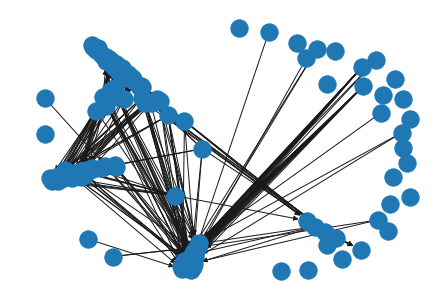

In [7]:
nx.draw(pkn.graph)

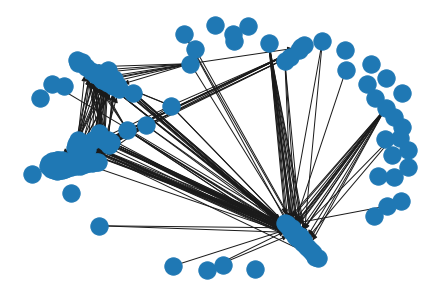

In [8]:

nx.draw(nx.compose(pkn.graph,ckn.graph))

## Visualizing the Project report

In [9]:
plots = p.show_report("notebook")

## Access to datasets

### Clinical data

In [18]:
clin_dataset = p.get_dataset('clinical').get_dataframe('processed')
clin_dataset.head()

Age  Alanine aminotransferase measurement  \
0   73                                  24.0   
1   49                                  27.0   
2   66                                  18.0   
3   61                                  22.0   
4   44                                  18.0   

   Alkaline phosphatase measurement  Aspartate aminotransferase measurement  \
0                                54                                      30   
1                                27                                      28   
2                                69                                      21   
3                               101                                      26   
4                                61                                      25   

   Bilirubin level  Body height  Body mass index  Diastole  \
0             15.0        182.0        27.774423        83   
1             17.0        177.0        28.727377        95   
2              9.0        158.0        28.841532        97   
3             12.0        165.0        42.056933        93   
4              8.0        182.0        29.434851        76   

   Fasting blood glucose level  Gamma glutamyl transferase measurement  ...  \
0                         5.07                                    21.0  ...   
1                         6.09                                    38.0  ...   
2                         4.93                                    18.0  ...   
3                         5.33                                    20.0  ...   
4                         4.80                                    13.0  ...   

   High density lipoprotein measurement  \
0                                  1.26   
1                                  1.70   
2                                  1.12   
3                                  0.91   
4                                  1.21   

   Low density lipoprotein cholesterol measurement  Systole  \
0                                              2.1      157   
1                                              4.3      134   
2                                              4.1      143   
3                                              4.8      141   
4                                              3.9      123   

   Triglycerides measurement  VLDL cholesterol measurement  \
0                       0.58                           0.3   
1                       1.24                           0.6   
2                       1.12                           0.5   
3                       2.20                           1.0   
4                       0.90                           0.4   

   Weight (property) (qualifier value)  biological_sample    group  \
0                                 92.0               BS30  Healthy   
1                                 90.0               BS31  Healthy   
2                                 72.0               BS32  Healthy   
3                                114.5               BS33  Healthy   
4                                 97.5               BS34  Healthy   

  platelets/liter  subject  
0             227      S30  
1             261      S31  
2             228      S32  
3             306      S33  
4             377      S34  

[5 rows x 21 columns]

#### Further dataset manipulation and visualization

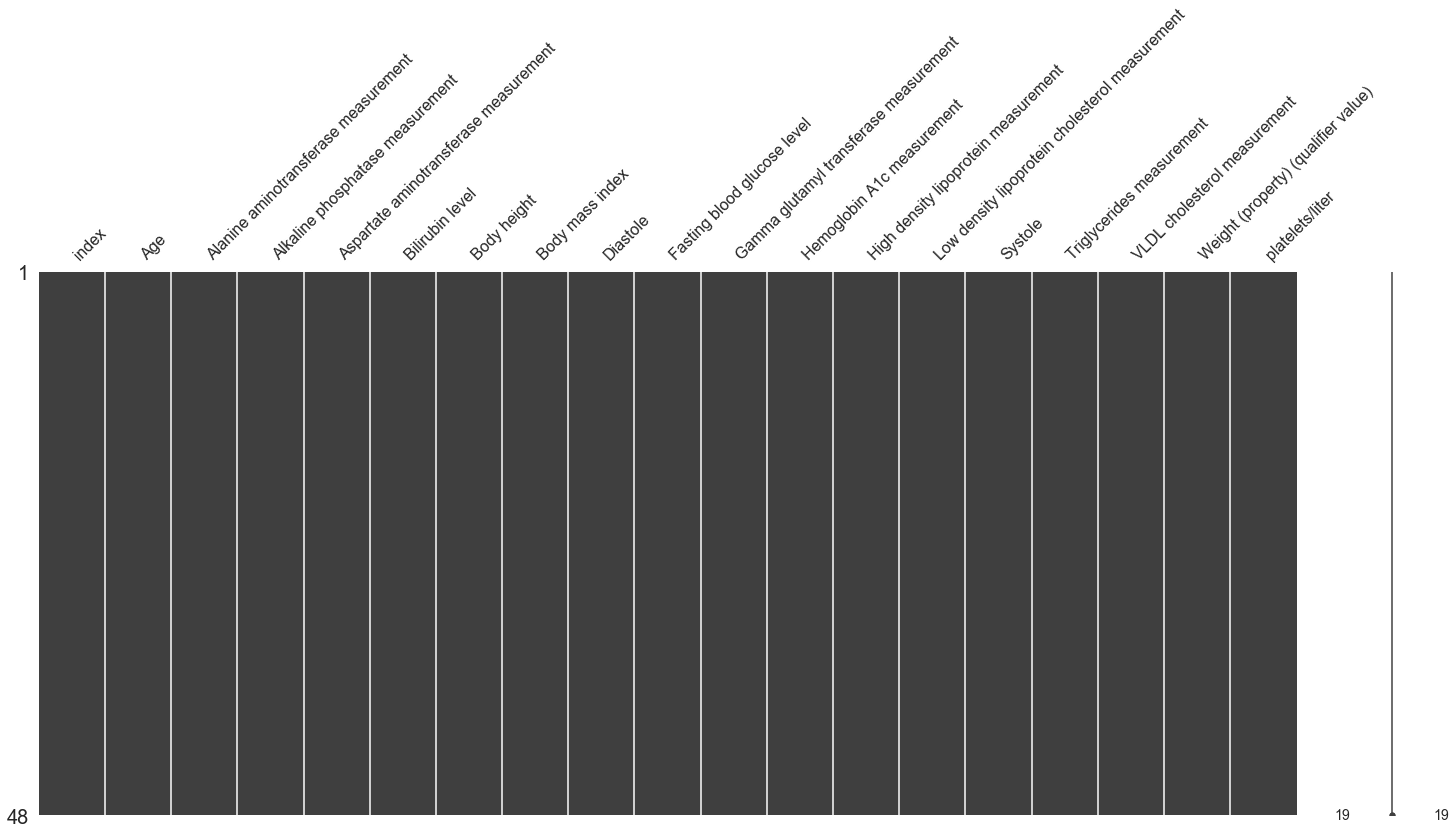

In [19]:
clin_dataset = clin_dataset.reset_index().set_index('subject').drop(['group', 'biological_sample'], axis=1)#.pivot_table(index='subject', columns='clinical_variable', values='value', aggfunc='first')
msno.matrix(clin_dataset)


### Proteomics dataset (original)

In [36]:
dataset = p.get_dataset("proteomics").get_dataframe('original')

In [37]:
dataset.head()

LFQ_intensity       group identifier  name sample subject
0      21.593090  NAFLD+T2DM     M0R009  A1BG   AS62     S62
1      37.884674   Cirrhosis     P01023   A2M   AS77     S77
2      37.309118   Cirrhosis     P01023   A2M   AS69     S69
3      38.271740   Cirrhosis     P01023   A2M   AS74     S74
4      37.384952   Cirrhosis     P01023   A2M   AS70     S70

In [39]:
proteomics = p.get_dataset("proteomics").get_dataframe("processed")

In [41]:
proteomics

A2M~P01023  A30~A2MYE2  ABI3BP~Q7Z7G0  ACE~P12821  ACTB~P60709  \
0    38.005564   28.173504      21.540133   22.165420    27.090330   
1    37.309118   27.981907      27.342062   23.847270    27.461155   
2    37.384952   28.857627      20.123246   22.863630    27.929764   
3    38.417225   28.978380      25.501910   22.992774    27.152479   
4    37.471303   28.748744      21.906161   22.203381    27.537048   
5    38.117296   28.829685      24.404660   23.752973    27.281358   
6    38.271740   29.145183      22.969478   23.857852    27.026544   
7    37.957887   28.844877      22.508163   24.955888    26.051540   
8    37.316049   29.532875      25.028927   21.928808    27.995557   
9    37.884674   29.190794      21.685730   21.272806    27.674585   
10   37.172267   27.313458      25.233156   20.536281    27.979074   
11   36.897240   28.550101      25.251670   20.723054    26.688458   
12   37.253761   28.393359      24.360115   19.281232    27.327060   
13   37.101435   27.986905      25.613204   20.301337    27.323972   
14   37.169563   28.806458      26.438967   23.431104    26.683380   
15   37.270827   28.667565      21.085817   23.971409    27.322597   
16   37.318660   28.428382      21.574379   24.137348    27.230777   
17   37.319754   29.097857      20.212951   21.168750    27.451519   
18   36.581751   28.159377      23.666657   21.533986    26.329799   
19   37.110992   27.359845      27.093658   23.769714    27.376666   
20   36.961826   28.305782      26.043021   19.833785    26.886463   
21   37.030135   28.298809      25.499327   20.860010    27.143165   
22   37.330229   28.127326      25.636481   19.827644    27.074084   
23   37.014632   28.108091      23.512196   19.226693    26.518078   
24   36.934845   28.140778      24.578480   21.559886    26.921048   
25   37.224322   26.986959      25.564570   23.072254    27.435712   
26   37.285370   28.557935      25.631895   19.089173    27.330227   
27   37.004099   28.627075      24.339941   21.827359    27.982451   
28   37.750974   28.316136      25.099529   25.828615    27.051651   
29   36.879890   27.899775      24.276113   23.975753    28.432132   
30   37.662423   28.969116      25.876333   23.889297    27.261499   
31   38.122126   28.689625      24.708778   23.628119    26.632424   
32   38.295883   28.105695      23.881290   22.600005    26.643752   
33   36.755707   28.502601      23.051905   22.202136    28.777184   
34   38.025399   28.338411      24.752156   20.588609    26.430107   
35   37.374787   28.637581      28.085830   23.962081    27.806181   
36   37.413368   27.596478      25.785717   22.932704    26.880930   
37   36.653442   28.568990      22.959646   23.541324    27.002280   
38   37.288038   28.277417      23.288587   19.448791    26.739310   
39   36.763148   28.712240      22.225713   23.405752    26.330346   
40   37.326801   27.104096      23.605145   22.866406    29.181725   
41   37.548117   28.629579      23.989885   21.886174    28.114062   
42   37.075271   28.349337      20.900597   23.427775    29.222210   
43   36.772519   27.832918      25.926714   21.908411    27.762686   
44   37.614412   28.024273      25.154792   23.489591    27.651436   
45   37.869701   28.045415      23.041130   23.732792    28.066765   
46   36.754339   28.155329      24.203873   20.086390    26.981308   
47   37.280884   27.855006      25.031009   23.097585    27.752003   

    ACTN1~P12814  ADA2~Q9NZK5  ADAMTS13~Q76LX8  ADAMTSL4~Q6UY14  ADH4~P08319  \
0      25.039968    23.442151        24.010605        25.085820    23.389032   
1      25.896268    23.754503        24.135818        19.183590    22.148706   
2      24.295225    23.359443        24.121788        24.923476    23.017163   
3      25.231288    23.701340        24.568309        24.878802    26.388112   
4      22.392992    22.406264        24.961173        21.995507    24.339540   
5      26.089360    23.462388        24.748725        24.554030    23.519765   
6      25.376

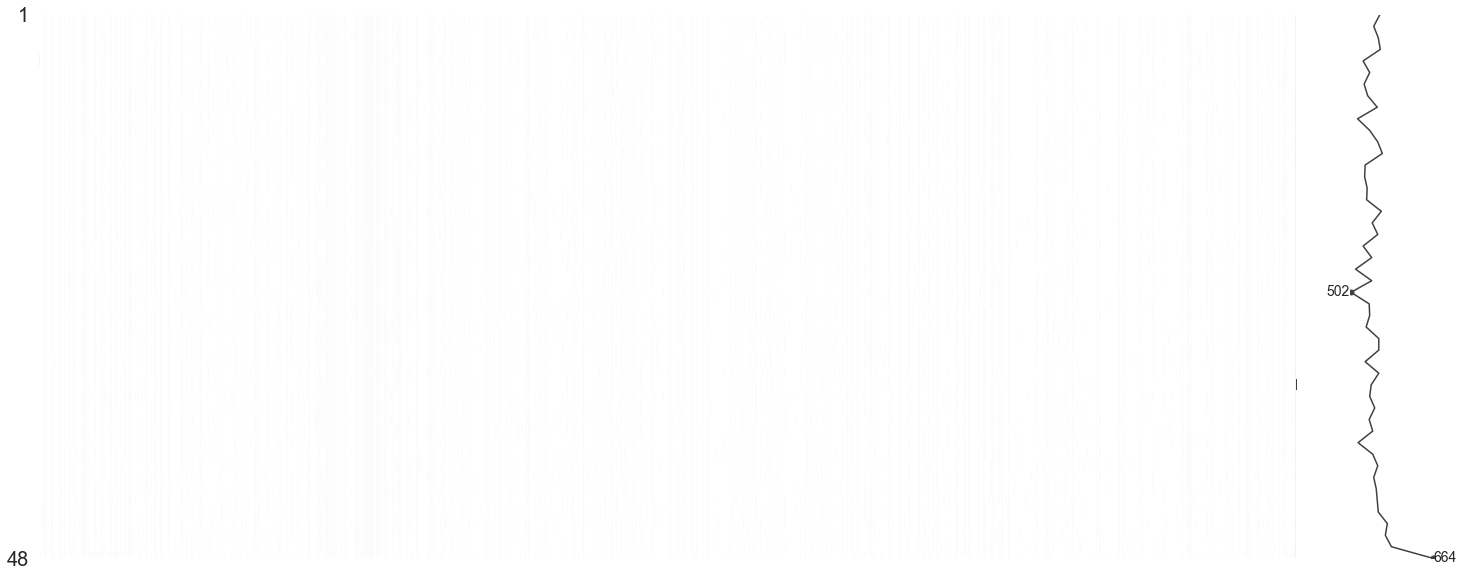

In [42]:
dataset = dataset.drop(['group'], axis=1).pivot_table(index='sample', columns='identifier', values='LFQ_intensity', aggfunc='first')
msno.matrix(dataset)

In [43]:
preprocessed_dataset = p.get_dataset('clinical').get_dataframe('processed')
preprocessed_dataset.head()

Age  Alanine aminotransferase measurement  \
0   73                                  24.0   
1   49                                  27.0   
2   66                                  18.0   
3   61                                  22.0   
4   44                                  18.0   

   Alkaline phosphatase measurement  Aspartate aminotransferase measurement  \
0                                54                                      30   
1                                27                                      28   
2                                69                                      21   
3                               101                                      26   
4                                61                                      25   

   Bilirubin level  Body height  Body mass index  Diastole  \
0             15.0        182.0        27.774423        83   
1             17.0        177.0        28.727377        95   
2              9.0        158.0        28.841532        97   
3             12.0        165.0        42.056933        93   
4              8.0        182.0        29.434851        76   

   Fasting blood glucose level  Gamma glutamyl transferase measurement  ...  \
0                         5.07                                    21.0  ...   
1                         6.09                                    38.0  ...   
2                         4.93                                    18.0  ...   
3                         5.33                                    20.0  ...   
4                         4.80                                    13.0  ...   

   High density lipoprotein measurement  \
0                                  1.26   
1                                  1.70   
2                                  1.12   
3                                  0.91   
4                                  1.21   

   Low density lipoprotein cholesterol measurement  Systole  \
0                                              2.1      157   
1                                              4.3      134   
2                                              4.1      143   
3                                              4.8      141   
4                                              3.9      123   

   Triglycerides measurement  VLDL cholesterol measurement  \
0                       0.58                           0.3   
1                       1.24                           0.6   
2                       1.12                           0.5   
3                       2.20                           1.0   
4                       0.90                           0.4   

   Weight (property) (qualifier value)  biological_sample    group  \
0                                 92.0               BS30  Healthy   
1                                 90.0               BS31  Healthy   
2                                 72.0               BS32  Healthy   
3                                114.5               BS33  Healthy   
4                                 97.5               BS34  Healthy   

  platelets/liter  subject  
0             227      S30  
1             261      S31  
2             228      S32  
3             306      S33  
4             377      S34  

[5 rows x 21 columns]

### Proteomics dataset (imputed)

In [50]:
reg_dataset = p.get_dataset("proteomics").get_dataframe("regulation table")
reg_dataset#.loc[reg_dataset['identifier'] == 'O60341-KDM1A',:]

-log10 pvalue  F-statistics        FC           Method  \
0          2.414074      0.151486  1.617763  SAMR Multiclass   
1          2.414074      0.151486  1.593280  SAMR Multiclass   
2          2.414074      0.151486  1.299539  SAMR Multiclass   
3          2.414074      0.151486  1.446935  SAMR Multiclass   
4          2.414074      0.151486 -1.015366  SAMR Multiclass   
5          2.414074      0.151486 -1.244874  SAMR Multiclass   
6          2.414074      0.151486 -1.118062  SAMR Multiclass   
7          2.414074      0.151486 -1.226035  SAMR Multiclass   
8          2.414074      0.151486 -1.101142  SAMR Multiclass   
9          2.414074      0.151486  1.113422  SAMR Multiclass   
10         2.174261      0.140534  1.466117  SAMR Multiclass   
11         2.174261      0.140534  1.614402  SAMR Multiclass   
12         2.174261      0.140534  1.309485  SAMR Multiclass   
13         2.174261      0.140534  1.776454  SAMR Multiclass   
14         2.174261      0.140534  1.101142  SAMR Multiclass   
15         2.174261      0.140534 -1.119613  SAMR Multiclass   
16         2.174261      0.140534  1.211673  SAMR Multiclass   
17         2.174261      0.140534 -1.233707  SAMR Multiclass   
18         2.174261      0.140534  1.099616  SAMR Multiclass   
19         2.174261      0.140534  1.356604  SAMR Multiclass   
20         0.480421      0.073764 -1.684126  SAMR Multiclass   
21         0.480421      0.073764 -3.287521  SAMR Multiclass   
22         0.480421      0.073764 -2.236124  SAMR Multiclass   
23         0.480421      0.073764 -1.603251  SAMR Multiclass   
24         0.480421      0.073764 -1.952064  SAMR Multiclass   
25         0.480421      0.073764 -1.327765  SAMR Multiclass   
26         0.480421      0.073764  1.050445  SAMR Multiclass   
27         0.480421      0.073764  1.471207  SAMR Multiclass   
28         0.480421      0.073764  2.051956  SAMR Multiclass   
29         0.480421      0.073764  1.394744  SAMR Multiclass   
...             ...           ...       ...              ...   
5180       1.889727      0.129465  1.626758  SAMR Multiclass   
5181       1.889727      0.129465  1.678299  SAMR Multiclass   
5182       1.889727      0.129465  1.339784  SAMR Multiclass   
5183       1.889727      0.129465  2.319799  SAMR Multiclass   
5184       1.889727      0.129465  1.031683  SAMR Multiclass   
5185       1.889727      0.129465 -1.214195  SAMR Multiclass   
5186       1.889727      0.129465  1.425038  SAMR Multiclass   
5187       1.889727      0.129465 -1.252664  SAMR Multiclass   
5188       1.889727      0.129465  1.381274  SAMR Multiclass   
5189       1.889727      0.129465  1.730273  SAMR Multiclass   
5190       0.099137      0.044439 -1.338855  SAMR Multiclass   
5191       0.099137      0.044439 -1.207481  SAMR Multiclass   
5192       0.099137      0.044439 -1.497961  SAMR Multiclass   
5193       0.099137      0.044439  1.076240  SAMR Multiclass   
5194       0.099137      0.044439  1.108801  SAMR Multiclass   
5195       0.099137      0.044439 -1.119613  SAMR Multiclass   
5196       0.099137      0.044439  1.440930  SAMR Multiclass   
5197       0.099137      0.044439 -1.240567  SAMR Multiclass   
5198       0.099137      0.044439  1.299539  SAMR Multiclass   
5199       0.099137      0.044439  1.612166  SAMR Multiclass   
5200       0.212813      0.056248 -1.019598  SAMR Multiclass   
5201       0.212813      0.056248  1.154285  SAMR Multiclass   
5202       0.212813      0.056248  1.009052  SAMR Multiclass   
5203       0.212813      0.056248  1.290562  SAMR Multiclass   
5204       0.212813      0.056248  1.176907  SAMR Multiclass   
5205       0.212813      0.056248  1.028827  SAMR Multiclass   
5206       0.212813      0.056248  1.316767  SAMR Multiclass   
5207       0.212813      0.056248 -1.143931  SAMR Multiclass   
5208       0.212813      0.056248  1.118062  SAMR Multiclass   
5209       0.212813      0.056248  1.278986  SAMR Multiclass   

                      correction  eff

In [80]:
result = analysisResult.AnalysisResult("Mapper analysis", analysis_type = "mapper", 
                           args = {"n_cubes": 15,
                                   "overlap": 0.85,
                                   "n_clusters": 2,
                                   "linkage": "single",
                                  "title":"Topological data analysis - Sample stratification"}, data=reg_dataset)
mapper_plot = result.get_plot(name="mapper", identifier="mapper_plot")[0]

AttributeError: 'float' object has no attribute 'sqrt'

In [ ]:
#iplot(mapper_plot.figure)

## Analyses results

#### Differential regulation

In [52]:
reg_table = p.get_dataset("proteomics").get_dataframe("regulation table").set_index('identifier')
reg_table.head()

-log10 pvalue  F-statistics        FC           Method  \
identifier                                                           
A2M~P01023       2.414074      0.151486  1.617763  SAMR Multiclass   
A2M~P01023       2.414074      0.151486  1.593280  SAMR Multiclass   
A2M~P01023       2.414074      0.151486  1.299539  SAMR Multiclass   
A2M~P01023       2.414074      0.151486  1.446935  SAMR Multiclass   
A2M~P01023       2.414074      0.151486 -1.015366  SAMR Multiclass   

                            correction  effsize efftype     group1  \
identifier                                                           
A2M~P01023  permutation FDR (250 perm)    1.662  hedges  Cirrhosis   
A2M~P01023  permutation FDR (250 perm)    1.609  hedges  Cirrhosis   
A2M~P01023  permutation FDR (250 perm)    0.905  hedges  Cirrhosis   
A2M~P01023  permutation FDR (250 perm)    1.270  hedges  Cirrhosis   
A2M~P01023  permutation FDR (250 perm)   -0.053  hedges    Healthy   

                group2  log2FC  mean(group1)  mean(group2)      padj  \
identifier                                                             
A2M~P01023     Healthy   0.694        37.814        37.120  0.016911   
A2M~P01023   NAFLD+NGT   0.672        37.814        37.142  0.016911   
A2M~P01023  NAFLD+T2DM   0.378        37.814        37.435  0.016911   
A2M~P01023        T2DM   0.533        37.814        37.280  0.016911   
A2M~P01023   NAFLD+NGT  -0.022        37.120        37.142  0.016911   

            padj_THSD    pvalue  rejected  std_error  t-statistics       tail  
identifier                                                                     
A2M~P01023   0.001393  0.003854      True      0.179         3.879  two-sided  
A2M~P01023   0.002201  0.003854      True      0.179         3.756  two-sided  
A2M~P01023   0.220367  0.003854      True      0.179         2.114  two-sided  
A2M~P01023   0.044508  0.003854      True      0.190         2.811  two-sided  
A2M~P01023   0.900000  0.003854      True      0.179        -0.123  two-sided